# Slider Controller of Redesigned Elements (S.C.O.R.E.)
Designed by Hao Wang $$ $$
Version 3.2 --last update 2023-Feb-10$$ $$
Email harrywang11@126.com for any problem

In [1]:
# necessary imports
import serial # pip install pyserial
import time
import serial.tools.list_ports
import cv2 # pip install opencv-python
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pyfirmata #pip install pyfirmata

In [2]:
# necessary function to connect arduino
# install firmata to arduino board first
def find_arduino(port=None):
    """Get the name of the port that is connected to Arduino."""
    if port is None:
        ports = serial.tools.list_ports.comports()
        for p in ports:
            if p.manufacturer is not None and "Arduino" in p.manufacturer:
                port = p.device
    return port

In [3]:
# get port number
port = find_arduino()
print(port)

COM5


In [4]:
# useful functions
def move(direction,time1):   #direction 1 = up, time in s take about 3s to set the connection for the first time
    board = pyfirmata.Arduino(port)
    if direction == 1:
        board.digital[3].write(1)
        board.digital[5].write(0)
        print('Moving up')
        time.sleep(time1)
        board.digital[3].write(0)
        board.digital[5].write(0)
    else:  
        board.digital[3].write(0)
        board.digital[5].write(1)
        print('Moving down')
        time.sleep(time1)
        board.digital[3].write(0)
        board.digital[5].write(0)
    time.sleep(1)
    board.exit()
    
def readloc(filename): #find laser dot location (red) 0.05s on i9
    img1 = mpimg.imread(filename)
    img = img1.copy()
    x = img[300:,0:100,1] # location of the red dot
    x[x<210] = 0 # manual thresholding
    x[x>=210]=1
    lp = np.where(x==1)
    lc = np.average(lp,axis = 1)
    return lc

# save the image at current folder with given name
def takeimg(imgname): #takes about 3s on i9, change camera for different timing
    camera = cv2.VideoCapture(1)
    # press s to take pic
    return_value,image = camera.read()
    cv2.imwrite(imgname,image)
    camera.release()
    cv2.destroyAllWindows()
    print('img saved',imgname)
    return imgname

In [11]:
# get image example for calibration
ts = time.time()
print(ts)
takeimg('h.jpg') #takes about 5s
ts2 = time.time()
print(ts2-ts)

1655237773.7862113
img saved h.jpg
45.33067226409912


In [9]:
# adjust initial position of slider
ts = time.time()
print(ts)
move(1,1) #takes about 7s
ts2 = time.time()
print(ts2-ts)

1657565756.3187387
Moving up
7.020999908447266


[90.33333333 51.04444444]


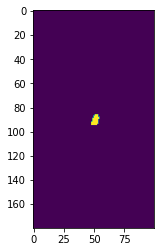

In [88]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# process the emaple image to determine key parameter
img1 = mpimg.imread('h.jpg')
img = img1.copy()
#plt.imshow(img)
#print(np.max(x))

# locate the reflected dot
x = img[300:,0:100,1]
# remove the background
x[x<210] = 0
x[x>=210]=1
#print(x)
#print(x.size)
lp = np.where(x==1)
lc = np.average(lp,axis = 1)

# the wanted height as next input for control
# take image for 3 times to get a more accurate reading
print(lc[0])
plt.imshow(x)

In [11]:
# run this is board is still connected
board.exit()

In [ ]:
def adj(height):
    takeimg('currentimg.jpg')
    img1 = mpimg.imread('currentimg.jpg')
    hig1 = readloc('currentimg.jpg')
    hig=hig1[0];
    if hig > height:
        while hig> height+1: #change this to desired height
            move(1,0.1)
            takeimg('currentimg.jpg')
            hig1 = readloc('currentimg.jpg')
            hig=hig1[0];
    else:
        while hig< height-1:
            move(0,0.1)
            takeimg('currentimg.jpg')
            hig1 = readloc('currentimg.jpg')
            hig=hig1[0]

In [16]:

import time
ts = time.time()
move(1,1)
time.sleep(60)
print(1)
move(0,1)
time.sleep(60)
print(1)
move(1,1)
time.sleep(60)
print(1)
move(0,1)
time.sleep(60)
print(1)

ts2 = time.time()
print(ts2-ts)

Moving up
1
Moving down
1
Moving up
1
Moving down
1
268.03576493263245


In [4]:
#ser = serial.Serial(port, 9600)
def moveslider():
    user_input = input("\n move up / down / quit : ")
    if user_input =="1":
        print("Moving up...")
        time.sleep(0.1) 
        ser.write(b'H') 
        moveslider()
    elif user_input =="0":
        print("Moving down...")
        time.sleep(0.1)
        ser.write(b'L')
        moveslider()
    elif user_input =="quit" or user_input == "q":
        print("Program Exiting")
        time.sleep(0.1)
        #ser.write(b'L')
        ser.close()
    else:
        print("Invalid input. Type on / off / quit.")
        moveslider()

def moveslider2(time1, direction):
    
    if direction == 1:
        print("Moving up...")
        time.sleep(time1) 
        ser.write(b'H') 
    else:
        print("Moving down...")
        time.sleep(time1)
        ser.write(b'L')
    
def moveuptime (time1):
    ser.write(b'H')
    time.sleep(time1)
    ser.write(b'L')

def moveslider3(direction):
    if direction ==1:
        print("Moving up...")
        time.sleep(0.1) 
        ser.write(b'H') 
    elif direction ==0:
        print("Moving down...")
        time.sleep(0.1)
        ser.write(b'L')
        #time.sleep(0.1)
    else:
        print("Not moving...")

def moveup():
    print("Moving up...")
    time.sleep(0.5) 
    ser.write(b'H')
    time.sleep(0.5)
def movedown():
    print("Moving up...")
    time.sleep(0.5) 
    ser.write(b'H')
    time.sleep(0.5)
    
def m4(ins):
    user_input = ins
    if user_input ==1:
        print("Moving up...")
        time.sleep(0.1) 
        ser.write(b'H') 
        #moveslider()
    elif user_input ==0:
        print("Moving down...")
        time.sleep(0.1)
        ser.write(b'L')
        #moveslider()
    elif user_input =="quit" or user_input == "q":
        print("Program Exiting")
        time.sleep(0.1)
        #ser.write(b'L')
        ser.close()
    else:
        print("Invalid input. Type on / off / quit.")
        moveslider()

In [26]:
# just take image without any adjustment
import os
import glob
import datetime
import time
dire =os.getcwd()+'\img'
for i in range(1000):
    name = dire+'//'+str(i)+'_'+'2022_06_14'+'.jpg' # change this for wanted names
    #print(name)
    takeimg(name)
    time.sleep(30) # interval for image taking in seconds

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//0_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//1_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//2_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//3_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//4_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//5_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//6_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//7_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//8_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//9_2022_

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//81_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//82_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//83_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//84_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//85_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//86_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//87_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//88_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//89_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//161_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//162_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//163_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//164_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//165_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//166_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//167_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//168_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//169_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\s

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//241_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//242_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//243_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//244_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//245_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//246_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//247_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//248_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//249_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\s

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//321_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//322_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//323_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//324_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//325_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//326_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//327_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//328_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//329_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\s

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//401_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//402_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//403_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//404_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//405_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//406_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//407_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//408_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//409_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\s

img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//481_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//482_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//483_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//484_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//485_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//486_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//487_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//488_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\slider\img//489_2022_06_14.jpg
img saved C:\Users\Harry\OneDrive\UNC\Research\William Polacheck\device\s

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [21]:
# get current time
import datetime
ct = datetime.datetime.now()
print("current time:-", str(ct)[:19])

current time:- 2022-06-14 16:26:18


In [21]:
# adjust movement for 1,0,1,0,1
import time
ts = time.time()
board = pyfirmata.Arduino(port)

board.digital[3].write(1)
board.digital[5].write(0)
print('Moving up')
time.sleep(0.5)
board.digital[3].write(0)
board.digital[5].write(0)
time.sleep(60)
board.digital[3].write(0)
board.digital[5].write(1)
print('Moving down')
time.sleep(0.5)
board.digital[3].write(0)
board.digital[5].write(0)
time.sleep(60)
board.digital[3].write(1)
board.digital[5].write(0)
print('Moving up')
time.sleep(0.5)
board.digital[3].write(0)
board.digital[5].write(0)
time.sleep(60)
board.digital[3].write(0)
board.digital[5].write(1)
print('Moving down')
time.sleep(0.5)
board.digital[3].write(0)
board.digital[5].write(0)
time.sleep(60)

board.exit()
ts2 = time.time()
print(ts2-ts)

Moving up
Moving down
Moving up
Moving down
247.01565170288086


In [20]:
move(0,3)

Moving down


In [ ]:
# take image every 30min for 10h
# maintain a constant position
from datetime import datetime
import time
import os
import glob
board = pyfirmata.Arduino(port)
stt=time.time()
avff = 58 # change this to example height

# record accurator position in this file
with open('12.12 200Pa log.txt', 'w') as f:    
    for i in range(3000):
        direction=2
        # get time
        now = datetime.now()
        current_time = now.strftime("%H%M%S")
        dire =os.getcwd()+'//img//'
        num = str(i);
        current_day = now.strftime("%D")
        c = current_day[0:2]+'_'+current_day[3:5]+'_'
        nm = dire+num+'_'+c+current_time+'.jpg'
        #print(nm)
        takeimgto(nm)
        #adj(54.6)
        takeimgto('currentimg.jpg')
        img=mpimg.imread('currentimg.jpg')
        img1=img.copy()
        x=img1[80:180,300:400,0] # change this to correct location
        x[x<150]=0 # change this
        #plt.imshow(x)
        xl,yl= ndi.center_of_mass(x)
        kk=0
        while (((xl>avff+0.3)or(xl<avff-0.3)) and kk<20): # change this to wanted accuracy
            kk=kk+1
            direction = 2
            if (xl>avff+0.3):
                direction=0
            if (xl<avff-0.3):
                direction=1
            time1=0.1
            if direction == 1:
                board.digital[3].write(1)
                board.digital[5].write(0)
                print('Moving up')
                time.sleep(time1)
                f.write('+0.1'+str(time.time()-stt))
                f.write('\n')
                board.digital[3].write(0)
                board.digital[5].write(0)
            if direction == 0:  
                board.digital[3].write(0)
                board.digital[5].write(1)
                print('Moving down')
                time.sleep(time1)
                f.write('-0.1'+str(time.time()-stt))
                f.write('\n')
                board.digital[3].write(0)
                board.digital[5].write(0)
            time.sleep(10)
            takeimgto('currentimg.jpg')
            current_time = now.strftime("%H%M%S")
            current_day = now.strftime("%D")
            c = current_day[0:2]+'_'+current_day[3:5]+'_'
            nm = dire+num+'_'+c+current_time+'.jpg'
            takeimgto(nm)
            img=mpimg.imread('currentimg.jpg')
            img1=img.copy()
            x=img1[80:180,300:400,0] # change this
            x[x<150]=0
            #plt.imshow(x)
            xl,yl= ndi.center_of_mass(x)
            direction = 2
        time.sleep(600) # change this time
board.exit()

In [ ]:
# just take image
board = pyfirmata.Arduino(port)
stt=time.time()
for i in range(120):
    direction=2
    now = datetime.now()
    current_time = now.strftime("%H%M%S")
    dire =os.getcwd()+'//img//'
    num = str(i);
    current_day = now.strftime("%D")
    c = current_day[0:2]+'_'+current_day[3:5]+'_'
    nm = dire+num+'_'+c+current_time+'.jpg'
    #print(nm)
    takeimgto(nm)
    time.sleep(1) # change this time
board.exit()